<a href="https://colab.research.google.com/github/afaq-ahmad123/Energy-Consumption-predict/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
df = pd.read_csv('/content/drive/My Drive/current/household_power_consumption.txt')
df.head()
len(df)

2075259

In [ ]:

# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric
 
# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]
 
# load all data
dataset = read_csv('/content/drive/My Drive/current/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('/content/drive/My Drive/current/household_power_consumption.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/current/household_power_consumption.csv')
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
df.columns=['datetime',	'Global_active_power', 'Global_reactive_power', 'Voltage',	'Global_intensity',	'Sub_metering_1',	'Sub_metering_2',	'Sub_metering_3',	'sub_metering_4']
df=df.dropna()
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True) #set date as index
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/current/household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
df = dataset.iloc[:,[0]]
df.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [ ]:
# data = pd.DataFrame(diff, columns=["power"])
# data.head()
cols = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12',
       'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19',
       'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24', 'lag_25', 'lag_26',
       'lag_27', 'lag_28', 'lag_29', 'lag_30', 'lag_31', 'lag_32', 'lag_33',
       'lag_34', 'lag_35', 'lag_36', 'lag_37', 'lag_38', 'lag_39', 'lag_40',
       'lag_41', 'lag_42', 'lag_43', 'lag_44', 'lag_45', 'lag_46', 'lag_47',
       'lag_48', 'lag_49', 'lag_50', 'lag_51', 'lag_52', 'lag_53', 'lag_54',
       'lag_55', 'lag_56', 'lag_57', 'lag_58', 'lag_59', 'lag_60', 'power']
dd = data[cols]
dd = dd.dropna()
dd.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_52,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,lag_60,power
60,0.094502,0.091772,0.091593,0.090704,0.119496,-0.332812,-0.268667,-0.345621,-0.361846,0.297060,0.343504,-0.099717,0.092069,-0.005314,-0.271094,-0.623943,-0.654663,-0.700282,-0.591428,-0.380614,-0.101802,0.201851,0.260839,0.199497,0.317571,-0.171635,-0.288273,-0.281712,-0.134825,0.205938,0.058661,0.034393,0.048377,0.051788,0.106776,-0.204652,-0.359938,-0.663144,-0.796117,-0.591594,-0.111699,0.015193,-0.028988,0.045435,0.009997,-0.170063,-0.436112,-0.431254,-0.466610,-0.271035,-0.068954,-0.066503,-0.080448,-0.085098,-0.036452,-0.053219,-0.398806,-0.463105,-0.454013,-0.225162,-0.077680
61,-0.077680,0.094502,0.091772,0.091593,0.090704,0.119496,-0.332812,-0.268667,-0.345621,-0.361846,0.297060,0.343504,-0.099717,0.092069,-0.005314,-0.271094,-0.623943,-0.654663,-0.700282,-0.591428,-0.380614,-0.101802,0.201851,0.260839,0.199497,0.317571,-0.171635,-0.288273,-0.281712,-0.134825,0.205938,0.058661,0.034393,0.048377,0.051788,0.106776,-0.204652,-0.359938,-0.663144,-0.796117,-0.591594,-0.111699,0.015193,-0.028988,0.045435,0.009997,-0.170063,-0.436112,-0.431254,-0.466610,-0.271035,-0.068954,-0.066503,-0.080448,-0.085098,-0.036452,-0.053219,-0.398806,-0.463105,-0.454013,-0.395860
62,-0.395860,-0.077680,0.094502,0.091772,0.091593,0.090704,0.119496,-0.332812,-0.268667,-0.345621,-0.361846,0.297060,0.343504,-0.099717,0.092069,-0.005314,-0.271094,-0.623943,-0.654663,-0.700282,-0.591428,-0.380614,-0.101802,0.201851,0.260839,0.199497,0.317571,-0.171635,-0.288273,-0.281712,-0.134825,0.205938,0.058661,0.034393,0.048377,0.051788,0.106776,-0.204652,-0.359938,-0.663144,-0.796117,-0.591594,-0.111699,0.015193,-0.028988,0.045435,0.009997,-0.170063,-0.436112,-0.431254,-0.466610,-0.271035,-0.068954,-0.066503,-0.080448,-0.085098,-0.036452,-0.053219,-0.398806,-0.463105,-0.394230
63,-0.394230,-0.395860,-0.077680,0.094502,0.091772,0.091593,0.090704,0.119496,-0.332812,-0.268667,-0.345621,-0.361846,0.297060,0.343504,-0.099717,0.092069,-0.005314,-0.271094,-0.623943,-0.654663,-0.700282,-0.591428,-0.380614,-0.101802,0.201851,0.260839,0.199497,0.317571,-0.171635,-0.288273,-0.281712,-0.134825,0.205938,0.058661,0.034393,0.048377,0.051788,0.106776,-0.204652,-0.359938,-0.663144,-0.796117,-0.591594,-0.111699,0.015193,-0.028988,0.045435,0.009997,-0.170063,-0.436112,-0.431254,-0.466610,-0.271035,-0.068954,-0.066503,-0.080448,-0.085098,-0.036452,-0.053219,-0.398806,-0.390777
64,-0.390777,-0.394230,-0.395860,-0.077680,0.094502,0.091772,0.091593,0.090704,0.119496,-0.332812,-0.268667,-0.345621,-0.361846,0.297060,0.343504,-0.099717,0.092069,-0.005314,-0.271094,-0.623943,-0.654663,-0.700282,-0.591428,-0.380614,-0.101802,0.201851,0.260839,0.199497,0.317571,-0.171635,-0.288273,-0.281712,-0.134825,0.205938,0.058661,0.034393,0.048377,0.051788,0.106776,-0.204652,-0.359938,-0.663144,-0.796117,-0.591594,-0.111699,0.015193,-0.028988,0.045435,0.009997,-0.170063,-0.436112,-0.431254,-0.466610,-0.271035,-0.068954,-0.066503,-0.080448,-0.085098,-0.036452,-0.053219,0.043137


In [ ]:
#data = pd.DataFrame(diff)
#type(data)
#data[0:5]
# for i in range(1, 61):
#     data["lag_{}".format(i)] = data['power'].shift(i)
dd.to_csv('/content/drive/My Drive/current/stat.csv')

In [ ]:
#df = pd.DataFrame(difference(np.log(df),100))
#df.head()
dd = df.reset_index(drop=True)
diff=difference(np.log(dd),100)

# plt.figure(figsize=(20,8))
# plt.plot(diff)
# plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


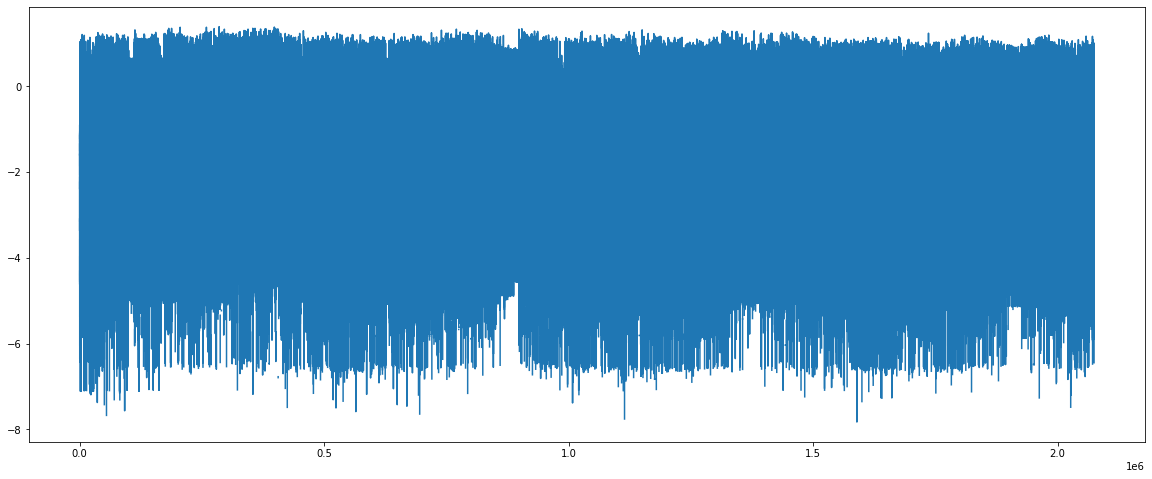

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = float(dataset.at[i,'Global_active_power']) - float(dataset.at[i - interval,'Global_active_power'])
		diff.append(value)
	return diff
 
#plt.xticks(df.index.values)
#df = df.reset_index(drop=True)
plt.figure(figsize=(20,8))
plt.plot(np.log(diff))

#good plt.plot(difference(np.log(df),60))
#plt.plot(df[96:3696])
plt.show()


In [ ]:
dataset = read_csv('/content/drive/My Drive/current/household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('/content/drive/My Drive/current/household_power_consumption_days.csv')


(1442, 8)
            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16             1209.176  ...    14680.933319
2006-12-17             3390.460  ...    36946.666732
2006-12-18             2203.826  ...    19028.433281
2006-12-19             1666.194  ...    13131.900043
2006-12-20             2225.748  ...    20384.800011

[5 rows x 8 columns]


In [ ]:
import time
from pandas import read_csv
start_time = time.time()
dataset = read_csv('/content/drive/My Drive/current/household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
print(time.time() - start_time)

1.4086666107177734


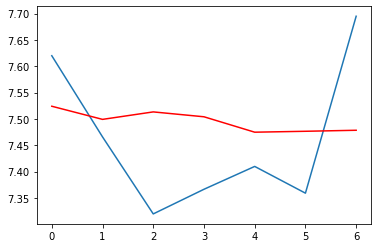

arima: [0.279] 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3


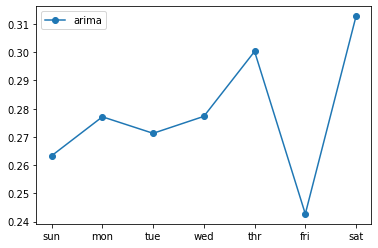

--- 29.110517501831055 seconds ---


In [ ]:

# arima forecast
from math import sqrt
from numpy import split
from numpy import array
import time
import numpy as np
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
 
# split a univariate dataset into train/test sets
def split_dataset(data):
	# split into standard weeks
	train, test = data[1:-328], data[-328:-6]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	actual = np.log(actual)
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
  
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	pyplot.plot(actual[-1])
	pyplot.plot(predicted[-1], color='red')
	pyplot.show()
	return score, scores



# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
 
# evaluate a single model
def evaluate_model(model_func, train, test):
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = model_func(history)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	predictions = array(predictions)
	# evaluate predictions days for each week
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores


# convert windows of weekly multivariate data into a series of total power
def to_series(data):
	# extract just the total power from each week
	series = [week[:, 0] for week in data]
	# flatten into a single series
	series = array(series).flatten()
	series= np.log(series)
	return series
 
# arima forecast
def arima_forecast(history):
	# convert history into a univariate series
  series = to_series(history)
  #series = np.log(series)
  # define the model
  model = ARIMA(series, order=(7,0,0))
  # fit the model
  model_fit = model.fit(disp=False)
  #print(model_fit.summary())
  # make forecast
  yhat = model_fit.predict(len(series), len(series)+6)
  return yhat
 
# load the new file
start_time = time.time()
dataset = read_csv('/content/drive/My Drive/current/household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# define the names and functions for the models we wish to evaluate
models = dict()
models['arima'] = arima_forecast
# evaluate each model
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
for name, func in models.items():
	# evaluate and get scores
	score, scores = evaluate_model(func, train, test)
	# summarize scores
	summarize_scores(name, score, scores)
	# plot scores
	pyplot.plot(days, scores, marker='o', label=name)
# show plot
pyplot.legend()
pyplot.show()
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
#pyplot.plot(days, scores, marker='o', label=name)
#pyplot.plot(test[:,:,0])
#pyplot.legend()
#pyplot.show()


(46, 7)


In [ ]:
history = [x for x in train]
series = to_series(history)
series[0:5]

array([3390.46 , 2203.826, 1666.194, 2225.748, 1723.288])

In [ ]:
test[0,:,0]

array([2083.454, 1604.132, 2219.78 , 1777.18 , 1769.442, 1797.208,
       2336.9  ])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
plt.xlabel("Date")
plt.ylabel("Global_active_power")
plt.title("production graph")
dataset = pd.read_csv('/content/drive/My Drive/current/household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
plt.xticks(dataset.index.values)
plt.plot(dataset['Global_active_power'])

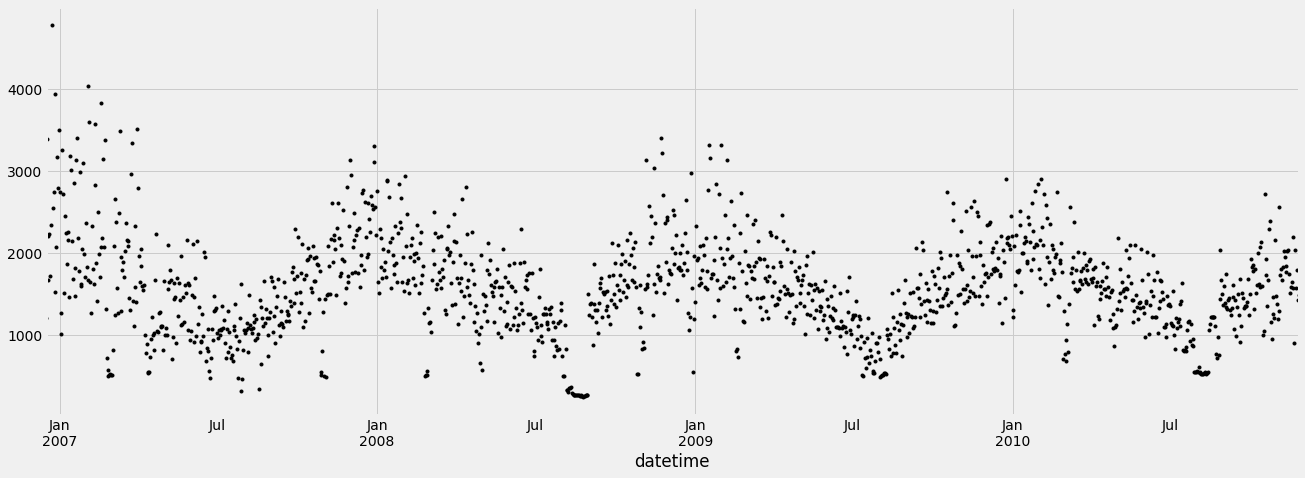

In [ ]:
plt.xticks(dataset.index.values)
rcParams['figure.figsize'] = 20, 7
#plt.plot(dataset['Global_active_power'])
dataset['Global_active_power'].plot(style='k.')
plt.show()

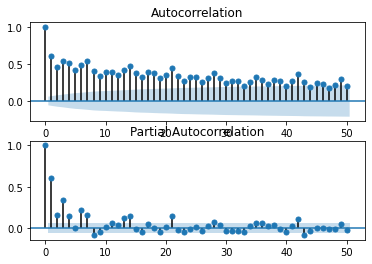

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
series = to_series(train)
# plots
pyplot.figure()
lags = 50
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()

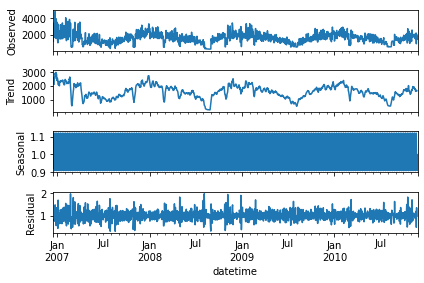

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(dataset['Global_active_power'], model='multiplicative')
result.plot()
plt.show()

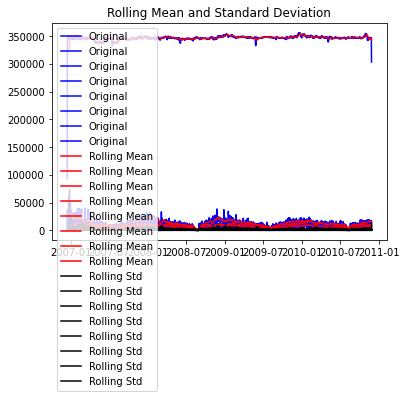

Results of dickey fuller test
Test Statistics                  -3.697385
p-value                           0.004150
No. of lags used                 22.000000
Number of observations used    1419.000000
critical value (1%)              -3.434967
critical value (5%)              -2.863579
critical value (10%)             -2.567856
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Global_active_power'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


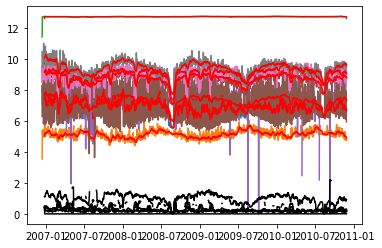

In [ ]:
import numpy as np

df_log = np.log(dataset)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [ ]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

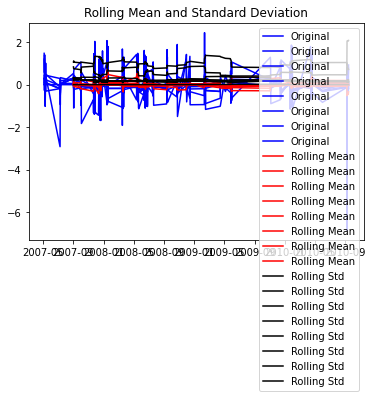

Results of dickey fuller test
Test Statistics                 -5.603497
p-value                          0.000001
No. of lags used                11.000000
Number of observations used    152.000000
critical value (1%)             -3.474121
critical value (5%)             -2.880750
critical value (10%)            -2.577013
dtype: float64


In [ ]:
test_stationarity(df_log_moving_avg_diff)

In [ ]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

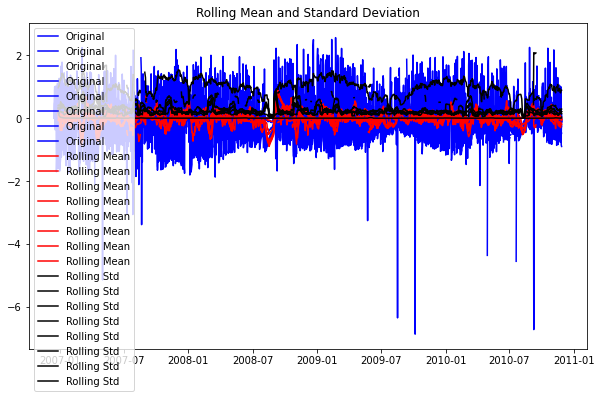

Results of dickey fuller test
Test Statistics               -6.855869e+00
p-value                        1.649100e-09
No. of lags used               2.200000e+01
Number of observations used    1.419000e+03
critical value (1%)           -3.434967e+00
critical value (5%)           -2.863579e+00
critical value (10%)          -2.567856e+00
dtype: float64


In [ ]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

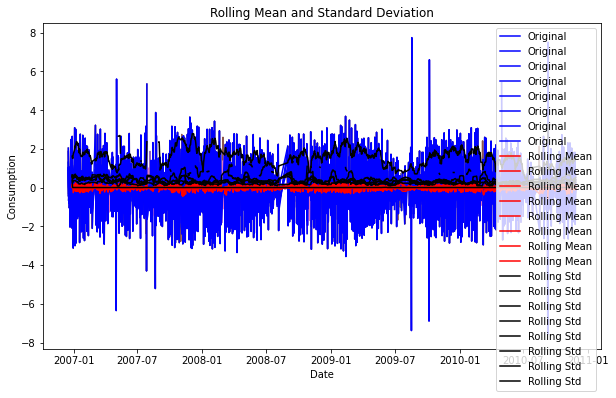

Results of dickey fuller test
Test Statistics               -9.891046e+00
p-value                        3.557312e-17
No. of lags used               2.000000e+01
Number of observations used    1.300000e+03
critical value (1%)           -3.435390e+00
critical value (5%)           -2.863766e+00
critical value (10%)          -2.567955e+00
dtype: float64


In [ ]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.0MB/s 


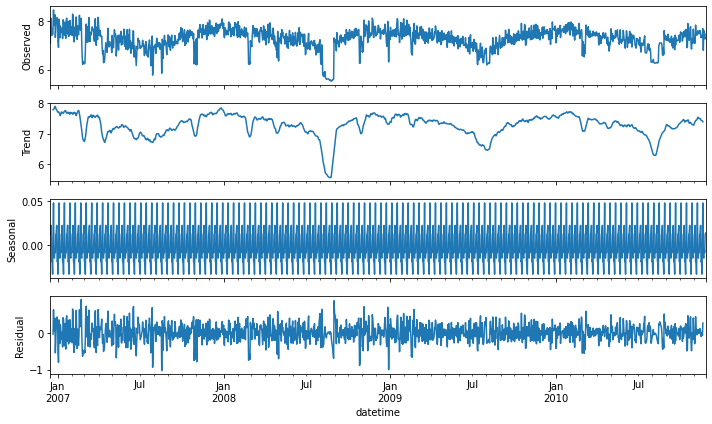

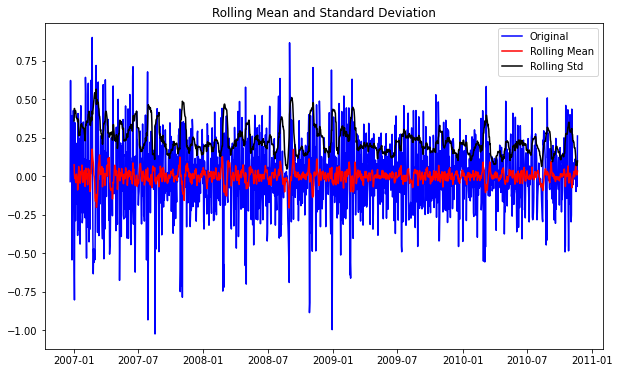

Results of dickey fuller test


KeyError: ignored

In [ ]:
from chart_studio.plotly import plot_mpl
from numpy import nan
from statsmodels.tsa.seasonal import seasonal_decompose
#dfa = df_log.replace(0, nan)
#mask = df_log != np.inf
#dfa.loc[~mask] = df_log.loc[mask].max()
result = seasonal_decompose(df_log['Global_active_power'], model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


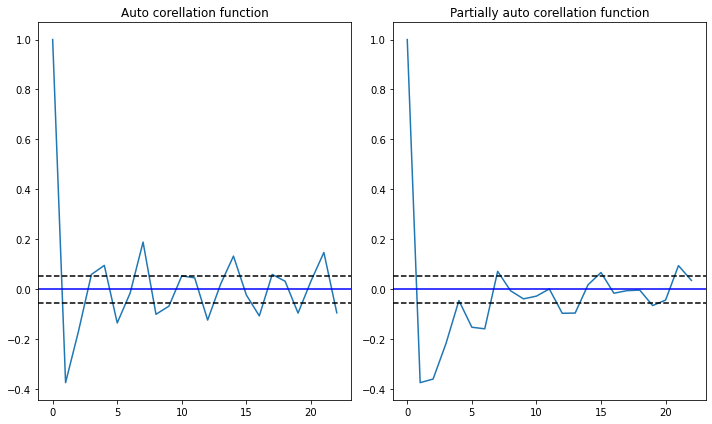

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff['Global_active_power'], nlags=22)
pacf= pacf(df_log_diff['Global_active_power'], nlags=22,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()